# City of San Diego: Foursquare Venue Analysis

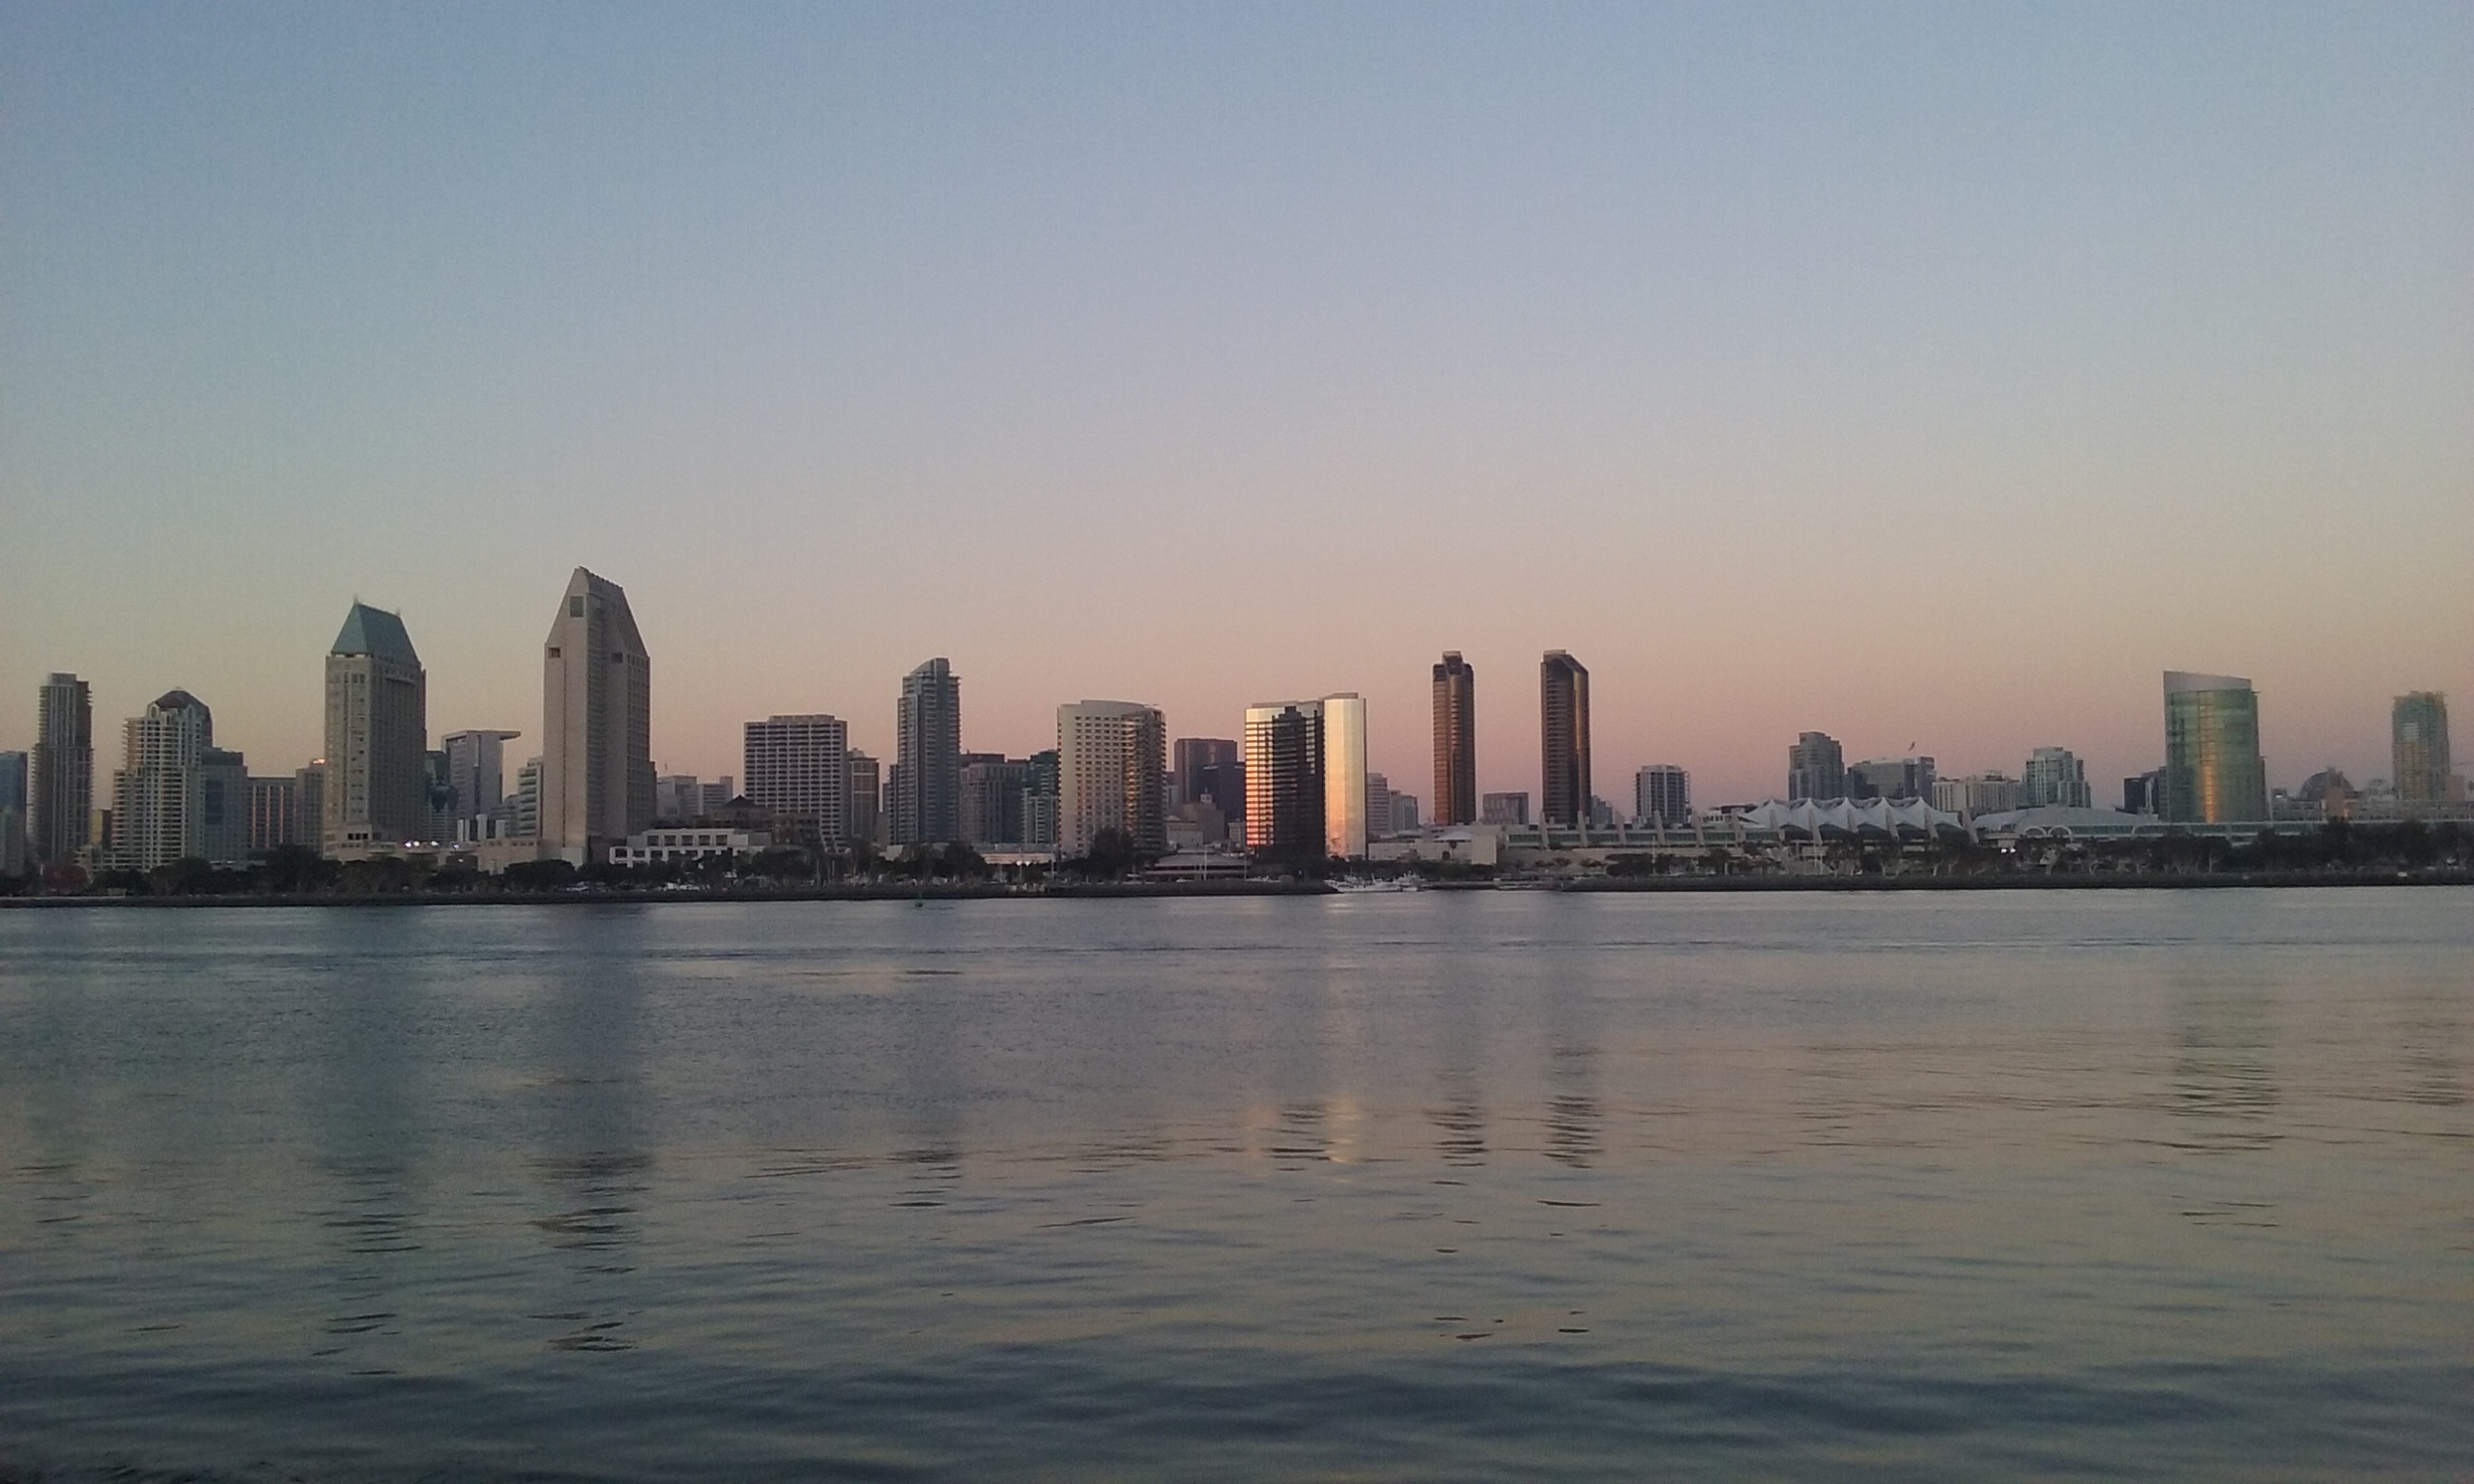

Welcome to this notebook! In this notebook, I perform a Foursquare venue analysis for San Diego. 

For my IBM Data Science Capstone Project, I picked the City of Vancouver. San Diego is an interesting city as well. I collect Foursquare Venue data and I make a top 10 of the venues. Also, I take a look at the coffee shops distribution in San Diego and the Starbucks coffee shops in San Diego. 

In [1]:
#import packages
import pandas as pd
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import requests # library to handle requests
import random # library for random number generation

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

import geocoder # import geocoder

import folium # plotting library

#for webscraping
from bs4 import BeautifulSoup 

from html_table_extractor.extractor import Extractor

# Transform a json file into a pandas data frame
from pandas.io.json import json_normalize #package for flattening json in pandas df


# Import k-means for clustering
from sklearn.cluster import KMeans

# Matplotlib associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#url related packages
import urllib.request
import zipfile
import chardet

print("Packages installed and libraries imported.")

Packages installed and libraries imported.


-------------------------------------------------------------------------------------------------------------------------------

### San Diego Postal Codes

I collect the San Diego Postal Codes data first. 

In [2]:
path = '..../Foursquare/SanDiego.xlsx'

df = pd.read_excel(path)

In [3]:
df.head(5)

,Zip,City,State,Latitude,Longitude
0,92134,San Diego,CA,32.562,-117.072
1,92168,San Diego,CA,33.017,-116.846
2,92179,San Diego,CA,32.573,-116.919
3,92132,San Diego,CA,32.644,-117.138
4,92113,San Diego,CA,32.697,-117.120


In [4]:
#Latitude and Longitude of San Diego
address = 'San Diego, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

32.7174202 -117.1627728


In [5]:
map_SanDiego = folium.Map(location=[latitude, longitude], zoom_start=10)

map_SanDiego

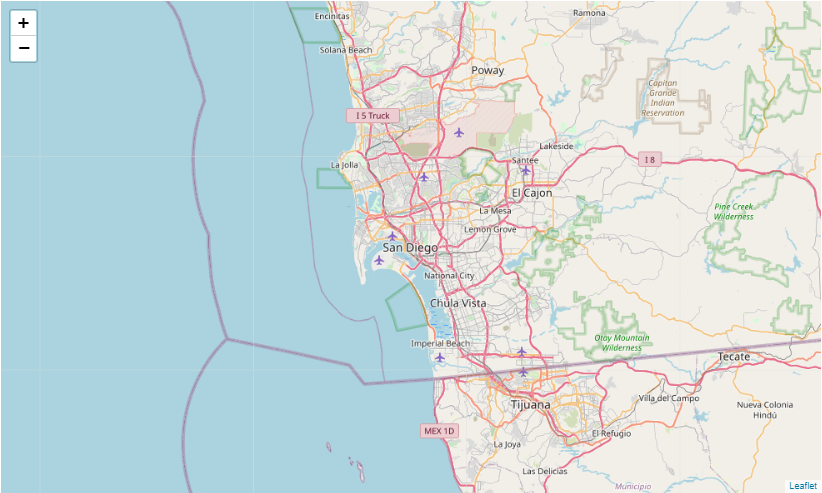

In [6]:
# add markers to map
for lat, lng, postalcode in zip(df['Latitude'], df['Longitude'], df['Zip']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanDiego)  
    
map_SanDiego

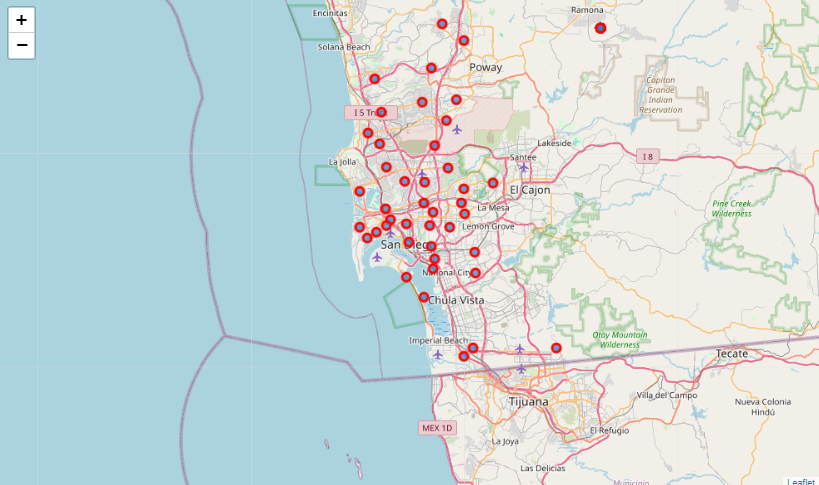

-------------------------------------------------------------------------------------------------------------------------------

### Foursquare: San Diego 

Let's retrieve the data from Foursquare.

In [7]:
#Foursquare
CLIENT_ID = '2NZNWQRHZPM1X0XVOZATYFBDOOFBPQNP4XSP3MNNAOWFJYTW' # your Foursquare ID
CLIENT_SECRET = '0FDT4C2ZDYFA0F5UDL2IORKUKPREKPMJIDODLVZ3WNOWJ2VF' # your Foursquare Secret
VERSION = '20190425' # Foursquare API version
LIMIT = 20 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2NZNWQRHZPM1X0XVOZATYFBDOOFBPQNP4XSP3MNNAOWFJYTW
CLIENT_SECRET:0FDT4C2ZDYFA0F5UDL2IORKUKPREKPMJIDODLVZ3WNOWJ2VF


In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
SanDiego_data = getNearbyVenues(names=df['Zip'],latitudes=df['Latitude'],longitudes=df['Longitude'])

92134
92168
92179
92132
92113
92145
92111
92127
92191
92190
92149
92114
92158
92122
92150
92155
92129
92192
92170
92175
92197
92136
92135
92133
92166
92169
92108
92139
92102
92119
92187
92198
92152
92154
92182
92115
92117
92110
92128
92184
92130
92103
92121
92105
92124
92101
92123
92193
92194
92116
92153
92171
92107
92147
92186
92106
92160
92109
92112
92104
92138
92162
92167
92163
92172
92161
92196
92142
92159
92174
92164
92177
78384
92165
92176
92126
92131
92137
92199
92140
92195
92120


In [10]:
SanDiego_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,92134,32.562,-117.072,Laundry Room,32.563204,-117.068401,Laundromat
1,92134,32.562,-117.072,I-5 / 905 Interchange,32.565136,-117.073370,Road
2,92168,33.017,-116.846,Prescription Plumbing,33.016920,-116.846040,Home Service
3,92168,33.017,-116.846,Green Tree Dumpsters,33.018042,-116.846493,Home Service
4,92168,33.017,-116.846,Panda Express,33.016900,-116.846000,Chinese Restaurant


Below are the venue categories that are located in San Diego. There are many home services, Chinese restaurants, coffee shops, Mexican restaurants, parks, and pizza places in San Diego.

In [11]:
SanDiego_data['Venue Category'].value_counts()

Home Service                     81
Chinese Restaurant               41
Sporting Goods Shop              41
Coffee Shop                      24
Mexican Restaurant               23
Park                             15
Pizza Place                      14
Hotel                            12
Sandwich Place                   11
Café                             11
Sushi Restaurant                  9
Convenience Store                 8
Ice Cream Shop                    8
Gym                               8
Italian Restaurant                8
Seafood Restaurant                7
Fast Food Restaurant              7
Bar                               6
Donut Shop                        6
Grocery Store                     6
Video Store                       5
Taco Place                        5
Salon / Barbershop                5
Juice Bar                         5
Burger Joint                      5
Intersection                      5
Gym / Fitness Center              5
Bakery                      

##### Top 10 Venues

In [12]:
# one hot encoding
SanDiego_category_dummies = pd.get_dummies(SanDiego_data[['Venue Category']])

# add neighborhood column back to dataframe
SanDiego_category_dummies['Neighborhood'] = SanDiego_data['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SanDiego_category_dummies.columns[-1]] + list(SanDiego_category_dummies.columns[:-1])
SanDiego_category_dummies = SanDiego_category_dummies[fixed_columns]

SanDiego_category_dummies.head()

,Neighborhood,Venue Category_ATM,Venue Category_American Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_BBQ Joint,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,...,Venue Category_Thrift / Vintage Store,Venue Category_Trail,Venue Category_Tree,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Winery,Venue Category_Yoga Studio
0,92134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,92134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
SanDiego_categories_grouped = SanDiego_category_dummies.groupby('Neighborhood').mean().reset_index()

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
# Create a table with the top 10 venues per neighborhood
top_venues = 10
columns = ['Neighborhood']
indicators = ['st', 'nd', 'rd']

for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SanDiego_categories_grouped['Neighborhood']

for ind in np.arange(SanDiego_categories_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SanDiego_categories_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,92101,Venue Category_Hotel,Venue Category_Middle Eastern Restaurant,Venue Category_Bar,Venue Category_Café,Venue Category_Falafel Restaurant,Venue Category_Donut Shop,Venue Category_Italian Restaurant,Venue Category_Plaza,Venue Category_Mexican Restaurant,Venue Category_Pizza Place
1,92102,Venue Category_Intersection,Venue Category_Marijuana Dispensary,Venue Category_Food Truck,Venue Category_Martial Arts School,Venue Category_Mexican Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Liquor Store,Venue Category_Hardware Store,Venue Category_Other Repair Shop,Venue Category_Deli / Bodega
2,92103,Venue Category_Coffee Shop,Venue Category_Sushi Restaurant,Venue Category_Mexican Restaurant,Venue Category_Organic Grocery,Venue Category_Sports Bar,Venue Category_Salon / Barbershop,Venue Category_Massage Studio,Venue Category_Grocery Store,Venue Category_Donut Shop,Venue Category_Yoga Studio
3,92104,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_Brewery,Venue Category_French Restaurant,Venue Category_Seafood Restaurant,Venue Category_Burger Joint,Venue Category_Taco Place,Venue Category_Italian Restaurant,Venue Category_Noodle House
4,92105,Venue Category_Home Service,Venue Category_American Restaurant,Venue Category_Furniture / Home Store,Venue Category_Garden Center,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Fondue Restaurant,Venue Category_Flower Shop,Venue Category_Fish Market,Venue Category_Fast Food Restaurant
5,92106,Venue Category_Coffee Shop,Venue Category_Mexican Restaurant,Venue Category_Seafood Restaurant,Venue Category_Hotel Bar,Venue Category_Dive Bar,Venue Category_Sushi Restaurant,Venue Category_Juice Bar,Venue Category_Bar,Venue Category_Thai Restaurant,Venue Category_Donut Shop
6,92107,Venue Category_Park,Venue Category_Beach,Venue Category_Yoga Studio,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Fondue Restaurant,Venue Category_Flower Shop,Venue Category_Fish Market,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market
7,92108,Venue Category_Hotel,Venue Category_Gym,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Sandwich Place,Venue Category_Hotel Pool,Venue Category_Intersection,Venue Category_Furniture / Home Store,Venue Category_Lingerie Store,Venue Category_Lounge
8,92109,Venue Category_Beach,Venue Category_Athletics & Sports,Venue Category_Outdoors & Recreation,Venue Category_Playground,Venue Category_Park,Venue Category_Pool,Venue Category_Gym,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Cupcake Shop
9,92110,Venue Category_Gym,Venue Category_Donut Shop,Venue Category_Mexican Restaurant,Venue Category_Performing Arts Venue,Venue Category_Fish Market,Venue Category_Flower Shop,Venue Category_Brewery,Venue Category_Rock Club,Venue Category_Marijuana Dispensary,Venue Category_Café


In [16]:
#additional data cleaning
neighborhoods_venues_sorted['1st Most Common Venue'] = neighborhoods_venues_sorted['1st Most Common Venue'].str[15:]
neighborhoods_venues_sorted['2nd Most Common Venue'] = neighborhoods_venues_sorted['2nd Most Common Venue'].str[15:]
neighborhoods_venues_sorted['3rd Most Common Venue'] = neighborhoods_venues_sorted['3rd Most Common Venue'].str[15:]
neighborhoods_venues_sorted['4th Most Common Venue'] = neighborhoods_venues_sorted['4th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['5th Most Common Venue'] = neighborhoods_venues_sorted['5th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['6th Most Common Venue'] = neighborhoods_venues_sorted['6th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['7th Most Common Venue'] = neighborhoods_venues_sorted['7th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['8th Most Common Venue'] = neighborhoods_venues_sorted['8th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['9th Most Common Venue'] = neighborhoods_venues_sorted['9th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['10th Most Common Venue'] = neighborhoods_venues_sorted['10th Most Common Venue'].str[15:]

In [17]:
neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,92101,Hotel,Middle Eastern Restaurant,Bar,Café,Falafel Restaurant,Donut Shop,Italian Restaurant,Plaza,Mexican Restaurant,Pizza Place
1,92102,Intersection,Marijuana Dispensary,Food Truck,Martial Arts School,Mexican Restaurant,Fast Food Restaurant,Liquor Store,Hardware Store,Other Repair Shop,Deli / Bodega
2,92103,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Organic Grocery,Sports Bar,Salon / Barbershop,Massage Studio,Grocery Store,Donut Shop,Yoga Studio
3,92104,Café,Pizza Place,Coffee Shop,Brewery,French Restaurant,Seafood Restaurant,Burger Joint,Taco Place,Italian Restaurant,Noodle House
4,92105,Home Service,American Restaurant,Furniture / Home Store,Garden Center,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
5,92106,Coffee Shop,Mexican Restaurant,Seafood Restaurant,Hotel Bar,Dive Bar,Sushi Restaurant,Juice Bar,Bar,Thai Restaurant,Donut Shop
6,92107,Park,Beach,Yoga Studio,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market
7,92108,Hotel,Gym,Coffee Shop,Convenience Store,Sandwich Place,Hotel Pool,Intersection,Furniture / Home Store,Lingerie Store,Lounge
8,92109,Beach,Athletics & Sports,Outdoors & Recreation,Playground,Park,Pool,Gym,Deli / Bodega,Department Store,Cupcake Shop
9,92110,Gym,Donut Shop,Mexican Restaurant,Performing Arts Venue,Fish Market,Flower Shop,Brewery,Rock Club,Marijuana Dispensary,Café


In [18]:
neighborhoods_venues_sorted.tail(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,92190,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
69,92191,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
70,92192,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
71,92193,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
72,92194,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
73,92195,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
74,92196,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
75,92197,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
76,92198,Home Service,Chinese Restaurant,Sporting Goods Shop,Cupcake Shop,Falafel Restaurant,Food,Fondue Restaurant,Flower Shop,Fish Market,Fast Food Restaurant
77,92199,Mexican Restaurant,Sushi Restaurant,Taco Place,Bar,Cosmetics Shop,Italian Restaurant,Sports Bar,Ice Cream Shop,Liquor Store,Tea Room


**Most Common Venues**

These are the most common venues for each postal code.

In [19]:
most_common_venues = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()
most_common_venues = most_common_venues.to_frame()
most_common_venues.reset_index(inplace=True)
most_common_venues = most_common_venues.rename(columns={'index':'Venue','1st Most Common Venue':'Count'})
most_common_venues

,Venue,Count
0,Home Service,40
1,Coffee Shop,4
2,Park,4
3,Convenience Store,2
4,Hotel,2
5,Seafood Restaurant,2
6,Intersection,2
7,Sandwich Place,2
8,Mexican Restaurant,2
9,Pizza Place,2


**Second Common Venues**

In [20]:
second_common_venues = neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts()
second_common_venues = second_common_venues.to_frame()
second_common_venues.reset_index(inplace=True)
second_common_venues = second_common_venues.rename(columns={'index':'Venue','2nd Most Common Venue':'Count'})
second_common_venues

,Venue,Count
0,Chinese Restaurant,39
1,Yoga Studio,4
2,Sushi Restaurant,2
3,Hotel,2
4,Donut Shop,2
5,Ice Cream Shop,2
6,Gym / Fitness Center,2
7,Marijuana Dispensary,1
8,Beach,1
9,Harbor / Marina,1


**Third Common Venues**

In [21]:
third_common_venues = neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()
third_common_venues = third_common_venues.to_frame()
third_common_venues.reset_index(inplace=True)
third_common_venues = third_common_venues.rename(columns={'index':'Venue','3rd Most Common Venue':'Count'})
third_common_venues

,Venue,Count
0,Sporting Goods Shop,39
1,Mexican Restaurant,3
2,Yoga Studio,2
3,Donut Shop,2
4,Gym,2
5,Coffee Shop,2
6,Food Truck,2
7,Shopping Mall,1
8,Park,1
9,Taco Place,1


**4th Common Venues**

In [22]:
fourth_common_venues = neighborhoods_venues_sorted['4th Most Common Venue'].value_counts()
fourth_common_venues = fourth_common_venues.to_frame()
fourth_common_venues.reset_index(inplace=True)
fourth_common_venues = fourth_common_venues.rename(columns={'index':'Venue','4th Most Common Venue':'Count'})
fourth_common_venues

,Venue,Count
0,Cupcake Shop,39
1,Food,3
2,Fondue Restaurant,3
3,Yoga Studio,2
4,Convenience Store,2
5,Pharmacy,2
6,Business Service,2
7,Bar,2
8,Café,2
9,Falafel Restaurant,2


**5th Common Venues**

In [23]:
fifth_common_venues = neighborhoods_venues_sorted['5th Most Common Venue'].value_counts()
fifth_common_venues = fifth_common_venues.to_frame()
fifth_common_venues.reset_index(inplace=True)
fifth_common_venues = fifth_common_venues.rename(columns={'index':'Venue','5th Most Common Venue':'Count'})
fifth_common_venues

,Venue,Count
0,Falafel Restaurant,41
1,Fondue Restaurant,4
2,Flower Shop,3
3,Middle Eastern Restaurant,2
4,Mexican Restaurant,2
5,Park,2
6,Donut Shop,1
7,Food Truck,1
8,Harbor / Marina,1
9,French Restaurant,1


**6th Common Venues**

In [24]:
six_common_venues = neighborhoods_venues_sorted['6th Most Common Venue'].value_counts()
six_common_venues = six_common_venues.to_frame()
six_common_venues.reset_index(inplace=True)
six_common_venues = six_common_venues.rename(columns={'index':'Venue','6th Most Common Venue':'Count'})
six_common_venues

,Venue,Count
0,Food,42
1,Flower Shop,5
2,Fish Market,3
3,Donut Shop,3
4,Italian Restaurant,2
5,Fondue Restaurant,2
6,Dog Run,2
7,Japanese Restaurant,2
8,Coffee Shop,2
9,Bubble Tea Shop,1


**7th Common Venues**

In [25]:
seven_common_venues = neighborhoods_venues_sorted['7th Most Common Venue'].value_counts()
seven_common_venues = seven_common_venues.to_frame()
seven_common_venues.reset_index(inplace=True)
seven_common_venues = seven_common_venues.rename(columns={'index':'Venue','7th Most Common Venue':'Count'})
seven_common_venues

,Venue,Count
0,Fondue Restaurant,41
1,Flower Shop,5
2,Fish Market,4
3,Fast Food Restaurant,3
4,Burger Joint,2
5,Sports Bar,2
6,Coffee Shop,2
7,Clothing Store,1
8,Dog Run,1
9,Brewery,1


**8th Common Venues**

In [26]:
eight_common_venues = neighborhoods_venues_sorted['8th Most Common Venue'].value_counts()
eight_common_venues = eight_common_venues.to_frame()
eight_common_venues.reset_index(inplace=True)
eight_common_venues = eight_common_venues.rename(columns={'index':'Venue','8th Most Common Venue':'Count'})
eight_common_venues

,Venue,Count
0,Flower Shop,42
1,Fish Market,5
2,Fast Food Restaurant,5
3,Farmers Market,3
4,Deli / Bodega,2
5,Coffee Shop,2
6,Hostel,1
7,Restaurant,1
8,Rock Club,1
9,Furniture / Home Store,1


**9th Common Venues**

In [27]:
nine_common_venues = neighborhoods_venues_sorted['9th Most Common Venue'].value_counts()
nine_common_venues = nine_common_venues.to_frame()
nine_common_venues.reset_index(inplace=True)
nine_common_venues = nine_common_venues.rename(columns={'index':'Venue','9th Most Common Venue':'Count'})
nine_common_venues

,Venue,Count
0,Fish Market,43
1,Fast Food Restaurant,5
2,Farmers Market,4
3,Falafel Restaurant,3
4,Pizza Place,2
5,Café,2
6,Dive Bar,1
7,College Arts Building,1
8,Mexican Restaurant,1
9,Donut Shop,1


**10th Common Venues**

In [28]:
ten_common_venues = neighborhoods_venues_sorted['10th Most Common Venue'].value_counts()
ten_common_venues = ten_common_venues.to_frame()
ten_common_venues.reset_index(inplace=True)
ten_common_venues = ten_common_venues.rename(columns={'index':'Venue','10th Most Common Venue':'Count'})
ten_common_venues

,Venue,Count
0,Fast Food Restaurant,42
1,Farmers Market,5
2,Donut Shop,4
3,Falafel Restaurant,3
4,Pizza Place,1
5,Café,1
6,Cupcake Shop,1
7,Liquor Store,1
8,Tea Room,1
9,Noodle House,1


-------------------------------------------------------------------------------------------------------------------------------

### Where to get a Cup of Coffee in San Diego?

Let's take a look at the coffee shops in San Diego! A coffee shop is a common venue in many cities. How about a delicious coffee from Starbucks?

In [29]:
SanDiego_coffeeshop_data = SanDiego_data[(SanDiego_data['Venue Category'] == 'Coffee Shop')]

In [30]:
SanDiego_coffeeshop_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,92111,32.805,-117.169,Starbucks,32.805635,-117.171668,Coffee Shop
21,92127,33.022,-117.107,Coffee Bean,33.019878,-117.110739,Coffee Shop
66,92129,32.961,-117.125,Starbucks,32.958426,-117.124904,Coffee Shop
132,92133,32.734,-117.216,Starbucks,32.736300,-117.217060,Coffee Shop
134,92133,32.734,-117.216,Starbucks,32.736389,-117.217083,Coffee Shop


In [31]:
len(SanDiego_coffeeshop_data)

24

In [32]:
SanDiego_coffeeshop_data

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,92111,32.805,-117.169,Starbucks,32.805635,-117.171668,Coffee Shop
21,92127,33.022,-117.107,Coffee Bean,33.019878,-117.110739,Coffee Shop
66,92129,32.961,-117.125,Starbucks,32.958426,-117.124904,Coffee Shop
132,92133,32.734,-117.216,Starbucks,32.736300,-117.217060,Coffee Shop
134,92133,32.734,-117.216,Starbucks,32.736389,-117.217083,Coffee Shop
146,92108,32.774,-117.138,Starbucks,32.771759,-117.139484,Coffee Shop
153,92108,32.774,-117.138,Milano Coffee Co,32.775050,-117.142857,Coffee Shop
214,92182,32.775,-117.076,Starbucks,32.776276,-117.074001,Coffee Shop
236,92115,32.760,-117.070,Starbucks,32.761019,-117.065175,Coffee Shop
252,92110,32.766,-117.201,Starbucks,32.764713,-117.197200,Coffee Shop


In [33]:
#Latitude and Longitude of San Diego
address = 'San Diego, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

32.7174202 -117.1627728


In [39]:
map_SanDiego_coffeeshop = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(SanDiego_coffeeshop_data['Venue Latitude'], SanDiego_coffeeshop_data['Venue Longitude'], SanDiego_coffeeshop_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanDiego_coffeeshop)  
    
map_SanDiego_coffeeshop

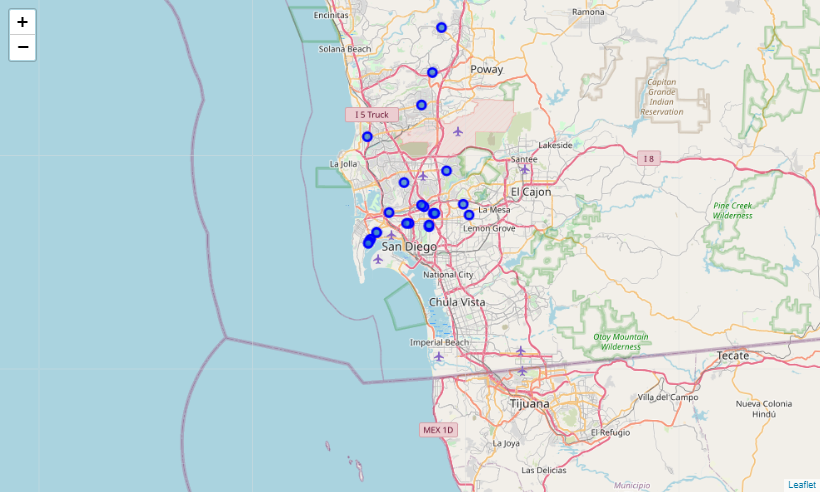

The blue dots in the map represent the coffee shops in San Diego.

In [35]:
SanDiego_coffeeshop_data.Venue.value_counts()

Starbucks                         13
Subterranean Coffee Boutique       1
Coffee Bean                        1
Tech Outfitters                    1
Lestat's Coffee House              1
Milano Coffee Co                   1
Dark Horse Coffee Roasters         1
Better Buzz Coffee: Point Loma     1
Torque: Moto & Cafe                1
Copper Top Coffee & Donuts         1
Philz Coffee                       1
Coffee Hub and Café                1
Name: Venue, dtype: int64

In [36]:
coffee_venue = SanDiego_coffeeshop_data.Venue.value_counts()
coffee_venue = coffee_venue.to_frame()
coffee_venue.reset_index(inplace=True)
coffee_venue = coffee_venue.rename(columns={'index':'Venue','Venue':'Count'})
coffee_venue

,Venue,Count
0,Starbucks,13
1,Subterranean Coffee Boutique,1
2,Coffee Bean,1
3,Tech Outfitters,1
4,Lestat's Coffee House,1
5,Milano Coffee Co,1
6,Dark Horse Coffee Roasters,1
7,Better Buzz Coffee: Point Loma,1
8,Torque: Moto & Cafe,1
9,Copper Top Coffee & Donuts,1


##### Starbucks Coffee

In [37]:
SanDiego_Starbucks = SanDiego_coffeeshop_data[(SanDiego_coffeeshop_data.Venue == 'Starbucks')]
SanDiego_Starbucks

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,92111,32.805,-117.169,Starbucks,32.805635,-117.171668,Coffee Shop
66,92129,32.961,-117.125,Starbucks,32.958426,-117.124904,Coffee Shop
132,92133,32.734,-117.216,Starbucks,32.736300,-117.217060,Coffee Shop
134,92133,32.734,-117.216,Starbucks,32.736389,-117.217083,Coffee Shop
146,92108,32.774,-117.138,Starbucks,32.771759,-117.139484,Coffee Shop
214,92182,32.775,-117.076,Starbucks,32.776276,-117.074001,Coffee Shop
236,92115,32.760,-117.070,Starbucks,32.761019,-117.065175,Coffee Shop
252,92110,32.766,-117.201,Starbucks,32.764713,-117.197200,Coffee Shop
280,92103,32.746,-117.167,Starbucks,32.749396,-117.168127,Coffee Shop
307,92124,32.823,-117.098,Starbucks,32.822290,-117.101760,Coffee Shop


In [38]:
map_SanDiego_Starbucks = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(SanDiego_Starbucks['Venue Latitude'], SanDiego_Starbucks['Venue Longitude'], SanDiego_Starbucks['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00FF00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanDiego_Starbucks)  
    
map_SanDiego_Starbucks 

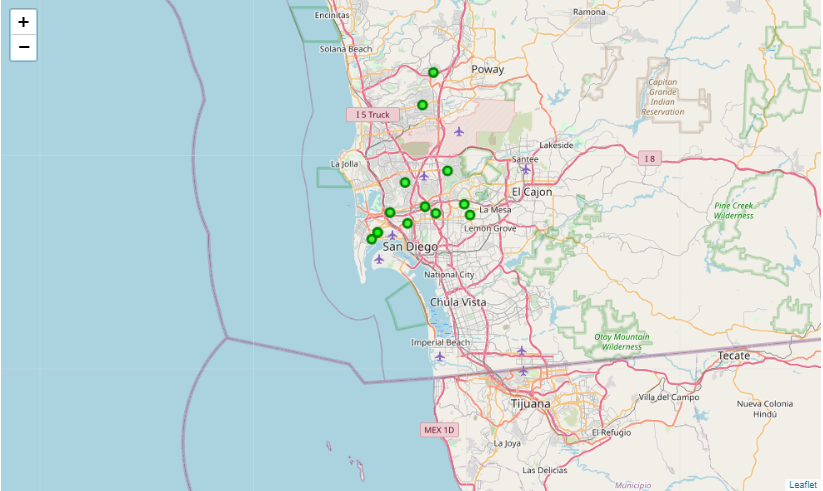

Here's where Starbucks is located in San Diego! 

**This is the end of this notebook. Hope you enjoyed it!**